In [46]:
import pandas as pd
import numpy as np 
from sklearn.tree import DecisionTreeClassifier,DecisionTreeRegressor
from sklearn.tree import plot_tree
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from mlxtend.plotting import plot_decision_regions

In [27]:
# read the Data Frame

In [28]:
df = pd.read_csv('try.csv')

In [29]:
len(df)

71

In [30]:
import random
l1= []
for i in range(71):
    x = random.randint(0,1)
    l1.append(x)

In [31]:
df['dropout'] =l1 

In [32]:
df.head()

,orphan,social_category,minority_group,bpl_beneficiary,ews_group,cwsn,mother's_occupation,father's_occupation,mother's_qualification,father's_qualification,...,debt,mental_issues,results_in_previous_year_type,status_in_previous_year,dropout_student,age_group,district,gender,label,dropout
0,0,4,7,1,1,0,0,1,1,3,...,0,0,1,1,0,0,1,0,NaN,0
1,0,1,3,1,0,0,0,0,2,2,...,1,0,1,2,0,2,3,1,NaN,0
2,1,3,0,0,0,0,0,0,0,0,...,0,0,2,1,1,3,4,1,NaN,1
3,0,2,5,1,0,0,1,1,3,2,...,0,0,1,0,0,1,1,1,NaN,1
4,0,1,7,0,1,0,1,1,4,5,...,0,0,1,1,0,4,2,0,NaN,1


In [114]:
df['weight'] = 1/71

In [115]:
x = df[['orphan', 'social_category', 'minority_group', 'bpl_beneficiary',
       'ews_group', 'cwsn', "mother's_occupation", "father's_occupation",
        "mother's_qualification", "father's_qualification",
       'family_annual_income', 'debt', 'mental_issues',
       'results_in_previous_year_type', 'status_in_previous_year',
       'dropout_student', 'age_group' , 'weight']]
y = df[['dropout']]

In [116]:
dt1 = DecisionTreeClassifier(max_depth=2)

In [117]:
dt1.fit(x,y)

DecisionTreeClassifier(max_depth=2)

[Text(0.5, 0.8333333333333334, 'X[16] <= 1.5\ngini = 0.495\nsamples = 71\nvalue = [39, 32]'),
 Text(0.25, 0.5, 'X[1] <= 3.5\ngini = 0.444\nsamples = 21\nvalue = [7, 14]'),
 Text(0.125, 0.16666666666666666, 'gini = 0.346\nsamples = 18\nvalue = [4, 14]'),
 Text(0.375, 0.16666666666666666, 'gini = 0.0\nsamples = 3\nvalue = [3, 0]'),
 Text(0.75, 0.5, 'X[2] <= 5.5\ngini = 0.461\nsamples = 50\nvalue = [32, 18]'),
 Text(0.625, 0.16666666666666666, 'gini = 0.365\nsamples = 25\nvalue = [19, 6]'),
 Text(0.875, 0.16666666666666666, 'gini = 0.499\nsamples = 25\nvalue = [13, 12]')]

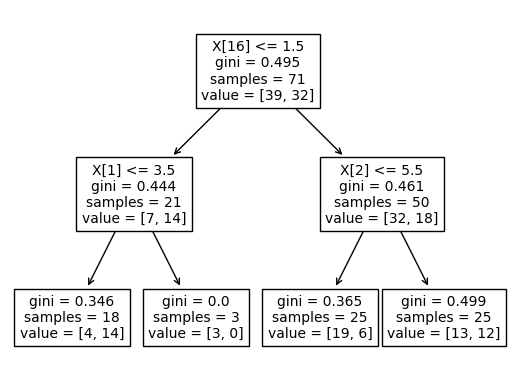

In [118]:
plot_tree(dt1)

In [119]:
df['y_pred'] = dt1.predict(x)

In [120]:
def calculate_model_weight(error):
    return 0.5*np.log((1-error)/(error))

In [121]:
alpha1 = calculate_model_weight(0.3)
alpha1

0.42364893019360184

In [122]:
def update_row_weights(row,alpha=0.423):
    if row['label'] == row['y_pred']:
        return row['weight'] * np.exp(-alpha)
    else:
        return row['weight'] * np.exp(alpha)

In [123]:
df['updated_weights'] = df.apply(update_row_weights,axis=1)

In [124]:
df['updated_weights'].unique()

array([0.02150048])